In [63]:
# Loading all the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [64]:
# Storing the IPL Matches and Deliveries dataset into variables

matches = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\matches.csv')
deliveries = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\deliveries.csv')
most_runs_average_strikerate = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\most_runs_average_strikerate.csv')
teamwise_home_and_away = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\teamwise_home_and_away.csv')
players = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\players.csv')

In [65]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [66]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Text(0, 0.5, 'Matches Played')

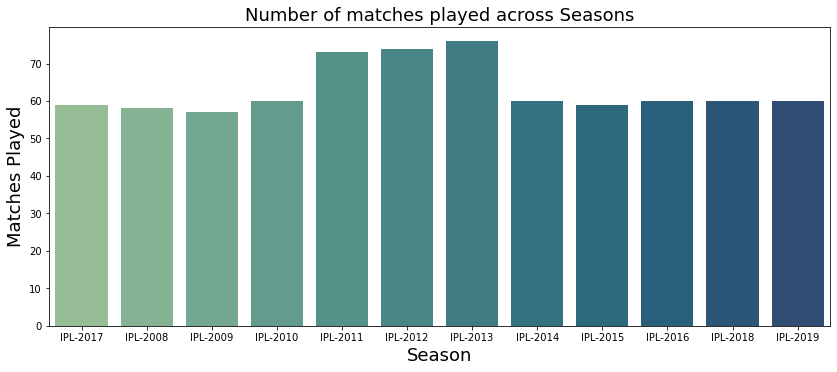

In [67]:
#Plotting the number of matches played in each season of IPL chronologically

plt.subplots(figsize=(14,5.5))
sns.countplot(x ='Season', data = matches, palette = sns.color_palette('crest',13))  
plt.title("Number of matches played across Seasons", fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Matches Played', fontsize = 18)

Text(0, 0.5, 'Count')

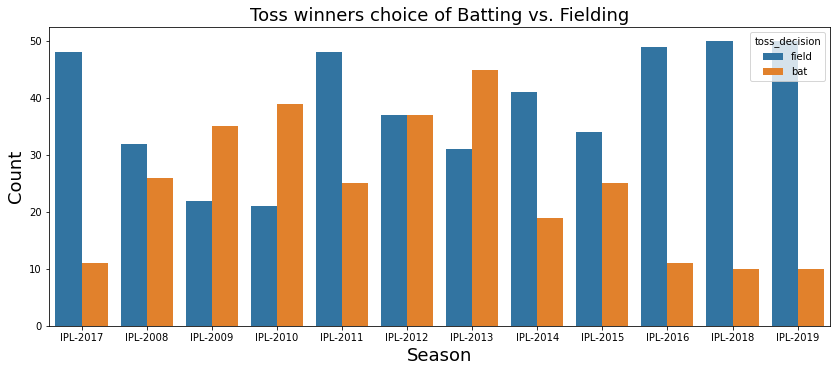

In [68]:
#Plotting a graph to show the decision taken to field or bat first by team that won the toss, across all seasons

plt.subplots(figsize=(14,5.5))
sns.countplot(x='Season',hue='toss_decision',data=matches)
plt.title('Toss winners choice of Batting vs. Fielding', fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

<AxesSubplot:xlabel='count', ylabel='toss_winner'>

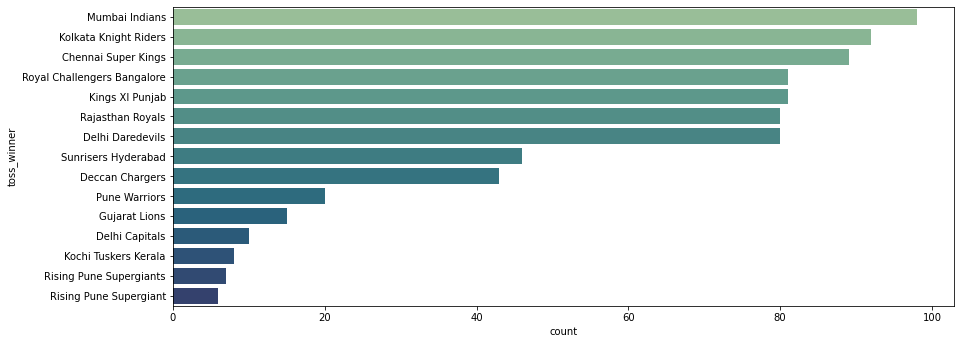

In [69]:
#Plot to show which team won the toss how many times
plt.subplots(figsize=(14,5.5))
sns.countplot(y = matches['toss_winner'], order=matches['toss_winner'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',15))

<AxesSubplot:xlabel='count', ylabel='Country'>

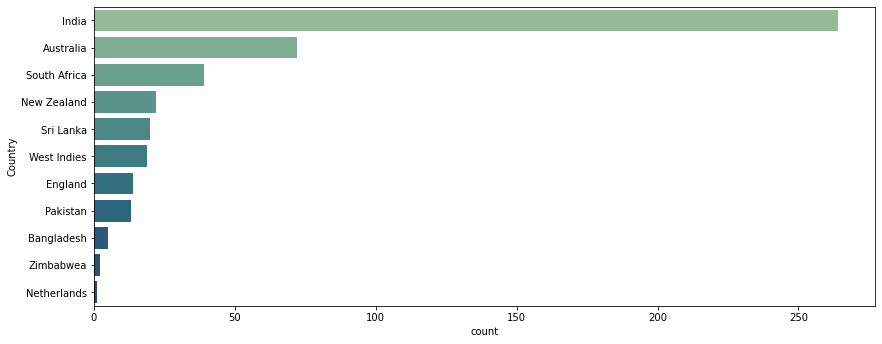

In [70]:
plt.subplots(figsize=(14,5.5))
sns.countplot(y = players['Country'], order=players['Country'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',11))

Text(0, 0.5, 'Awards Won from 2008-19')

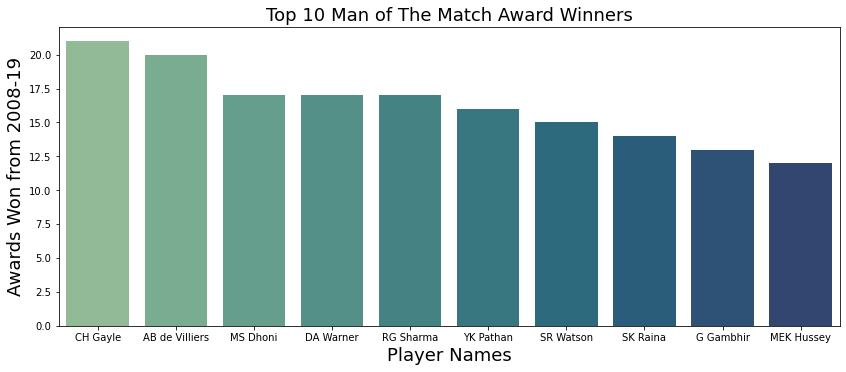

In [71]:
# Barplot to display the names of the players who have won maximum 'Man of The Match' Award

plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(matches['player_of_match'].value_counts()[0:10].keys()), y = list(matches['player_of_match'].value_counts()[0:10]),palette = sns.color_palette('crest', 10))
plt.title('Top 10 Man of The Match Award Winners', fontsize = 18)
plt.xlabel('Player Names', fontsize = 18)
plt.ylabel('Awards Won from 2008-19', fontsize = 18)

In [72]:
# Extracting record of instances where a wicket was taken on a delivery

delivery_with_wicket = deliveries.loc[deliveries['dismissal_kind'].notnull()]
delivery_with_wicket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 11 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          8834 non-null   int64 
 1   inning            8834 non-null   int64 
 2   batting_team      8834 non-null   object
 3   bowling_team      8834 non-null   object
 4   over              8834 non-null   int64 
 5   ball              8834 non-null   int64 
 6   batsman           8834 non-null   object
 7   non_striker       8834 non-null   object
 8   bowler            8834 non-null   object
 9   is_super_over     8834 non-null   int64 
 10  wide_runs         8834 non-null   int64 
 11  bye_runs          8834 non-null   int64 
 12  legbye_runs       8834 non-null   int64 
 13  noball_runs       8834 non-null   int64 
 14  penalty_runs      8834 non-null   int64 
 15  batsman_runs      8834 non-null   int64 
 16  extra_runs        8834 non-null   int64 
 17  total_runs 

<AxesSubplot:xlabel='bowler'>

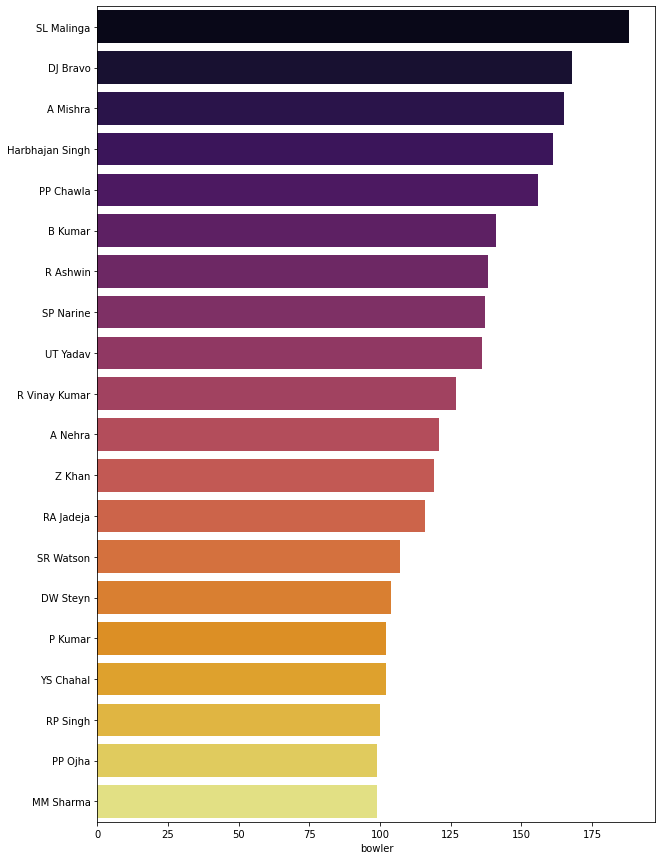

In [99]:
plt.subplots(figsize=(10,15))
sns.barplot(x = delivery_with_wicket['bowler'].value_counts()[0:20], y = list(delivery_with_wicket['bowler'].value_counts()[0:20].keys()), palette = sns.color_palette('inferno',20))

In [73]:
# Extracting record of instances where a team has won when choosing to bat first and viewing the first few elements of the table

batting_first = matches[matches['win_by_runs'] != 0]
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


Text(0, 0.5, 'Number of Matches')

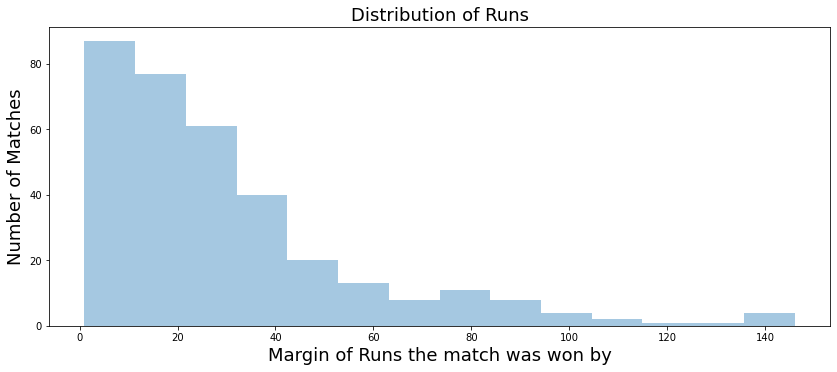

In [74]:
# Histogram to display the margin of runs a match has been won by

plt.subplots(figsize = (14,5.5))
sns.distplot(a = batting_first['win_by_runs'], kde = False, hist = True, bins = 14)
plt.title('Distribution of Runs', fontsize = 18)
plt.xlabel('Margin of Runs the match was won by', fontsize = 18)
plt.ylabel('Number of Matches', fontsize = 18)

<AxesSubplot:ylabel='winner'>

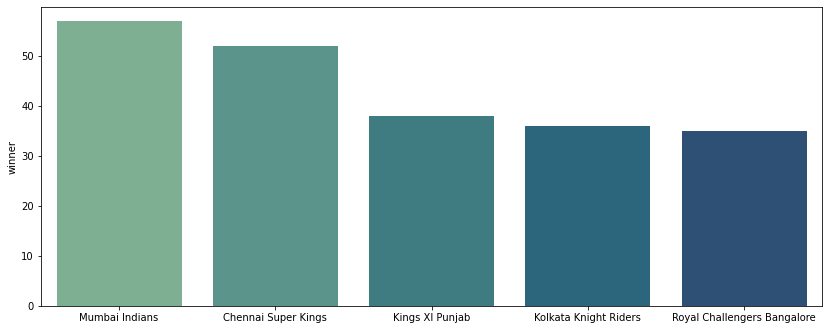

In [75]:
#Teams that have won maximum matches

fig, ax = plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(batting_first['winner'].value_counts()[0:5].keys()), y = batting_first['winner'].value_counts()[0:5], palette = sns.color_palette('crest',5))

Data related to Venue and Stadiums

<AxesSubplot:xlabel='count', ylabel='venue'>

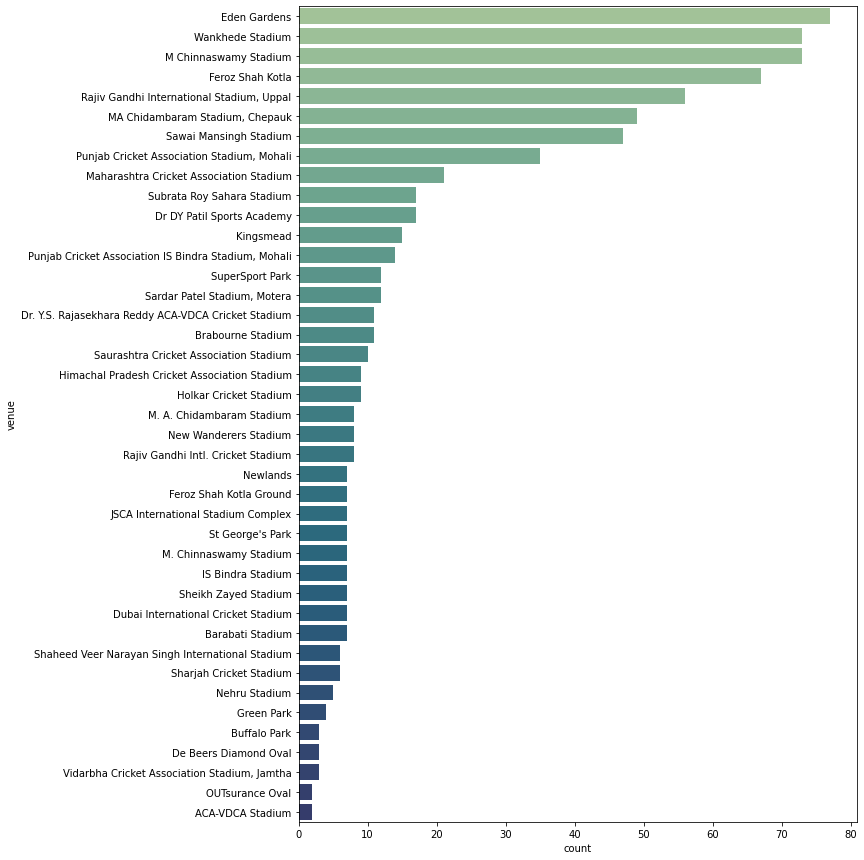

In [76]:
plt.subplots(figsize=(10,15))
sns.countplot(y = matches['venue'], order=matches['venue'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',41))

Data related to Umpires

In [77]:
print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

u_set1 = set(matches['umpire1'].unique())               
u_set2 = set(matches['umpire2'].unique())
u_set3 = set(matches['umpire3'].unique())
all_set = u_set1.intersection(u_set2)
all_set = all_set.intersection(u_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_set, len(all_set))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'A Nanda Kishore', 'KN Ananthapadmanabhan', 'C Shamshuddin', 'Anil Dandekar', 'K Ananthapadmanabhan', 'Yeshwant Barde', 'Ulhas Gandhe', 'Kumar Dharmasena', 'Rod Tucker', 'Vineet Kulkarni', 'Ian Gould', 'Nanda Kishore', 'Anil Chaudhary', 'Bruce Oxenford', 'Nitin Menon', 'O Nandan', 'Chris Gaffaney', 'S Ravi', 'Nigel Llong'} 20


Text(0.5, 1.0, 'Umpires-1 who have umpired most (from highest to lowest)')

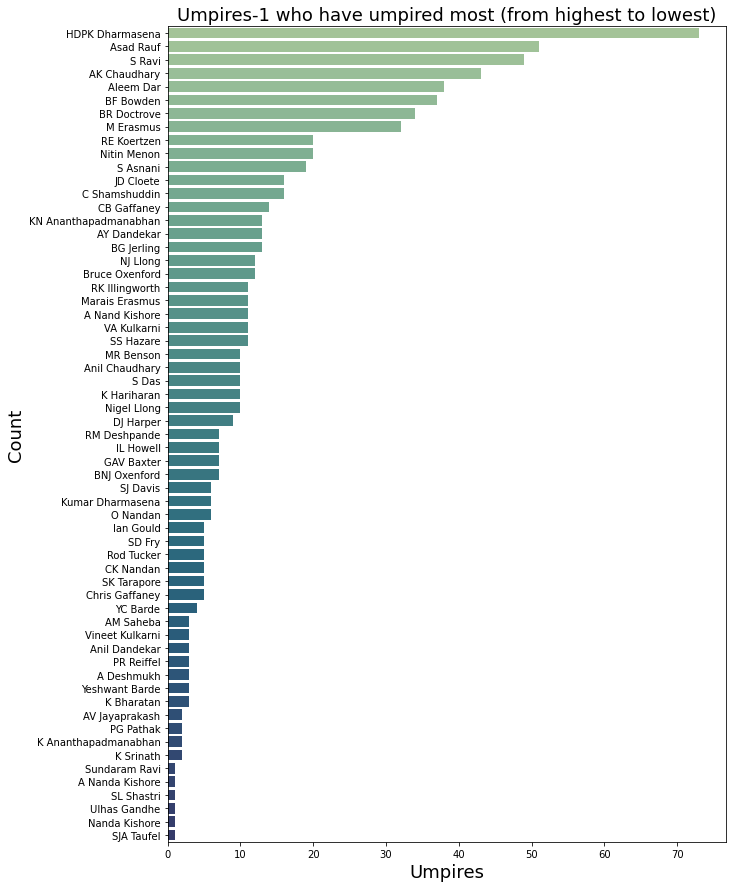

In [78]:
plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire1'], order=matches['umpire1'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',61))

plt.xlabel("Umpires", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=18)

Text(0.5, 1.0, 'Umpires-2 who have umpired most (from highest to lowest)')

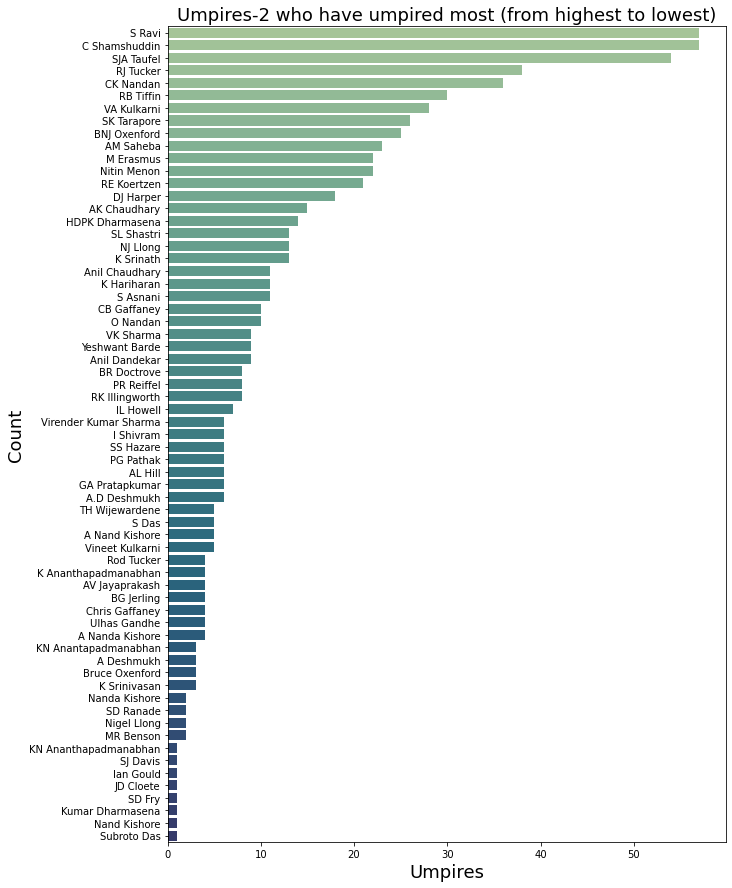

In [79]:
plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire2'], order=matches['umpire2'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',65))

plt.xlabel("Umpires", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize=18)

Text(0.5, 1.0, 'Umpires-3 who have umpired most (from highest to lowest)')

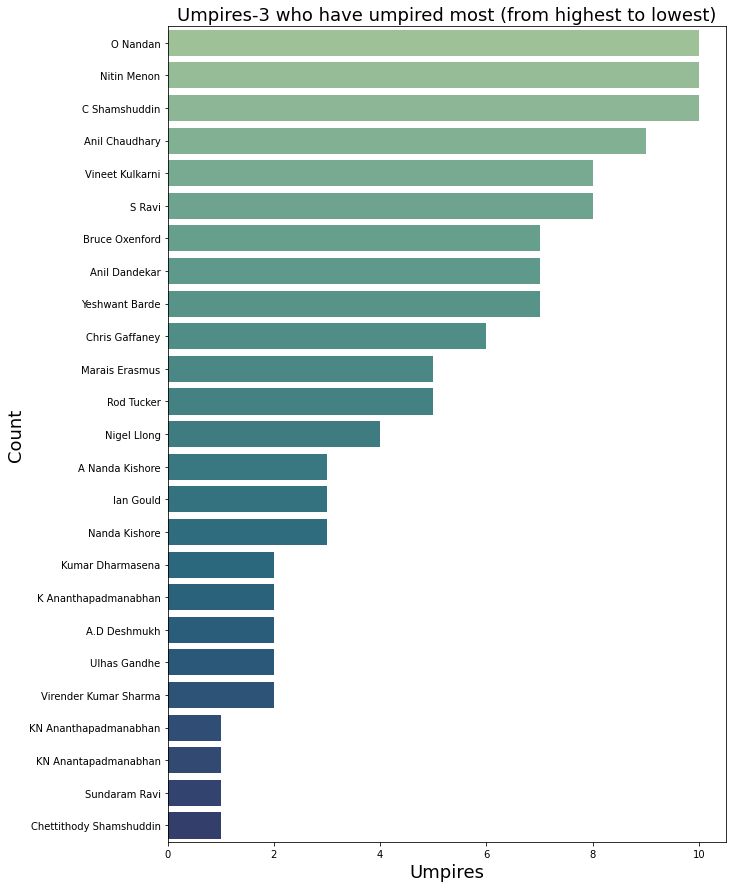

In [80]:
plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire3'], order=matches['umpire3'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',25))

plt.xlabel("Umpires", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=18)

Data related to Runs

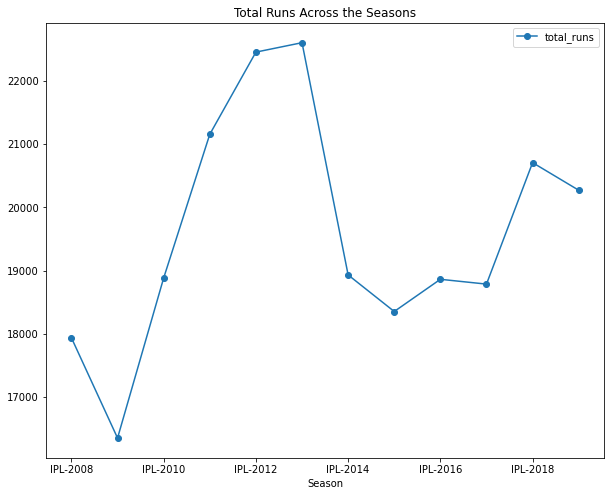

In [81]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='o')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

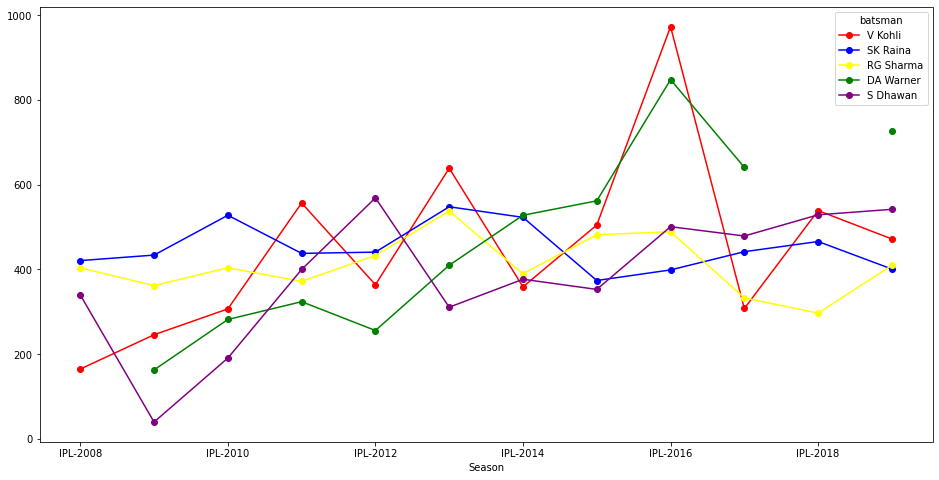

In [82]:
men = batsmen.groupby(['Season', 'batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['Season', 'batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis = 1)
men = men.sort_values(by = 'Total', ascending = False)[:5]
men.drop('Total', axis = 1, inplace = True)
men.T.plot(color=['red', 'blue', 'yellow', 'green', 'purple'], marker = 'o')
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.show()

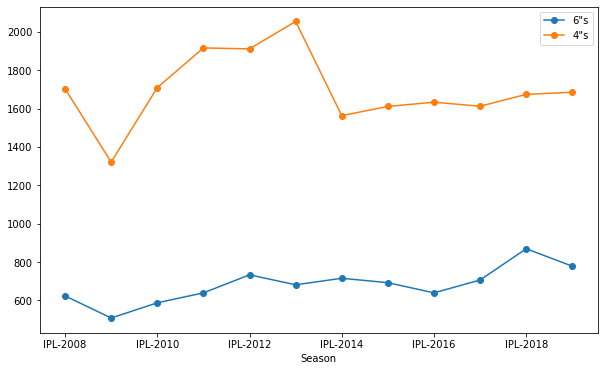

In [83]:
Season_boundaries=batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a = batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on = 'Season', right_on = 'Season', how = 'left')
Season_boundaries=Season_boundaries.rename(columns = {'batsman_runs_x':'6"s', 'batsman_runs_y':'4"s'})
Season_boundaries.set_index('Season')[['6"s', '4"s']].plot(marker = 'o')
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

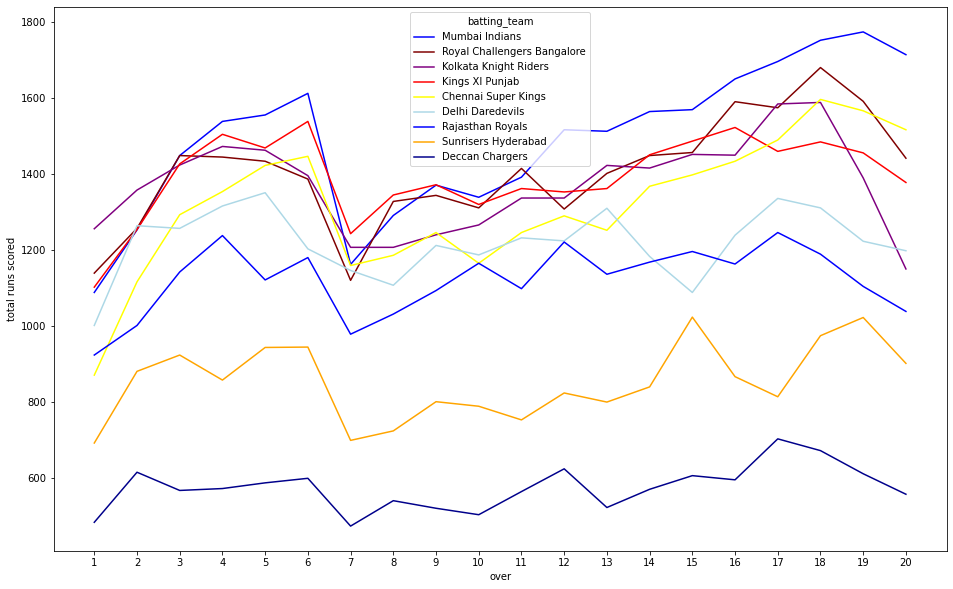

In [84]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']

matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index('Team',inplace=True)

runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=['blue', 'maroon', 'purple', 'red','yellow','lightblue','blue','orange','darkblue']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [85]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


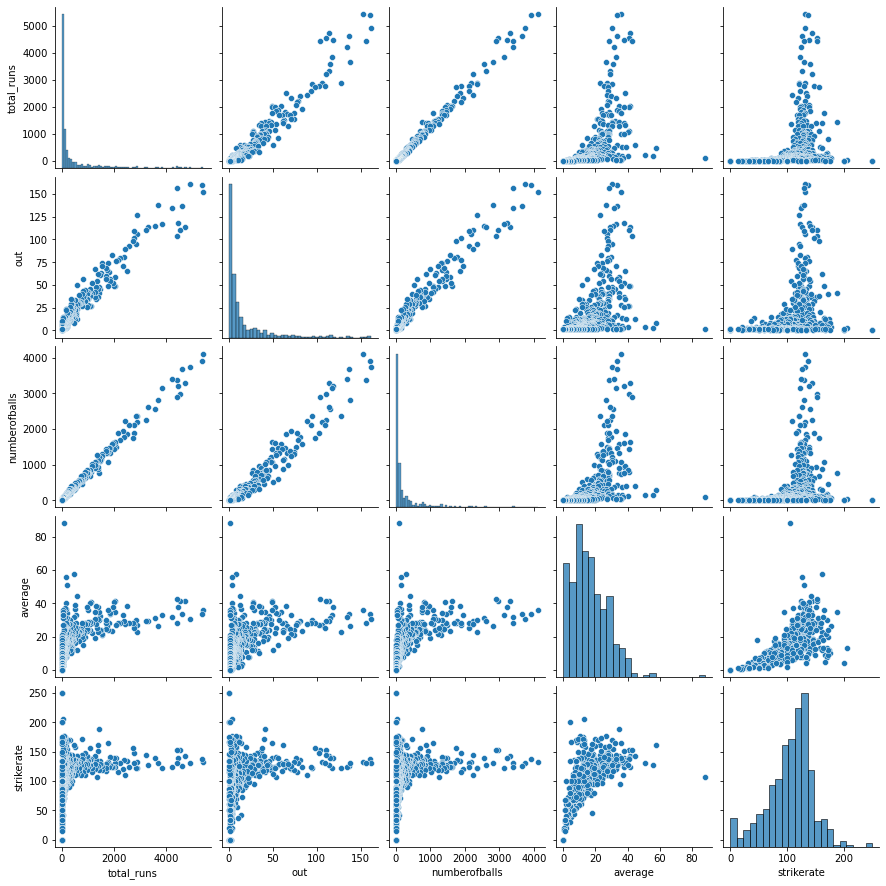

In [86]:
sns.pairplot(most_runs_average_strikerate)

<AxesSubplot:xlabel='home_wins', ylabel='team'>

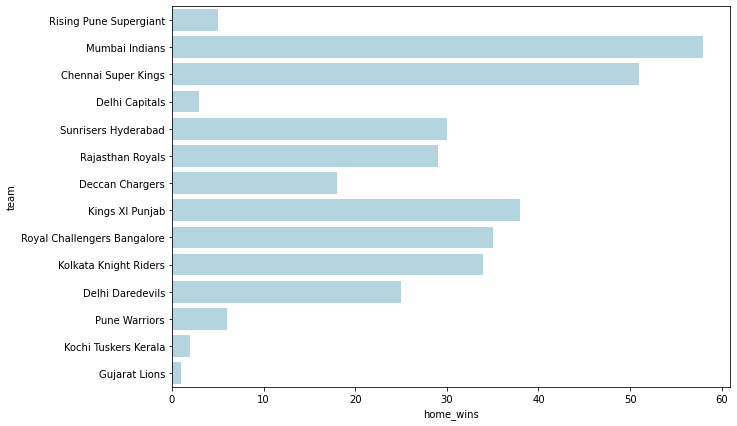

In [87]:
plt.subplots(figsize = (10,7))
sns.barplot(y = teamwise_home_and_away['team'], x = teamwise_home_and_away['home_wins'], color = 'lightblue')

<AxesSubplot:xlabel='away_wins', ylabel='team'>

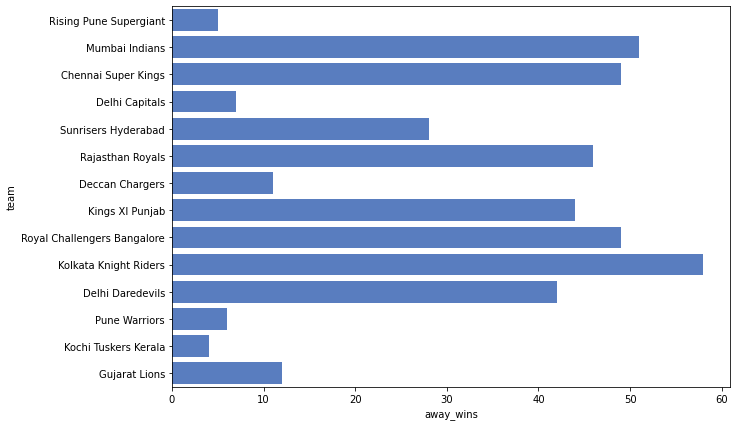

In [88]:
plt.subplots(figsize = (10,7))
sns.set_color_codes("muted")
sns.barplot(y = teamwise_home_and_away['team'], x = teamwise_home_and_away['away_wins'], color = 'b')

([<matplotlib.patches.Wedge at 0x24a81c7ef10>,
 [Text(0.3805142883934778, 1.032089567977705, 'Batting'),
  Text(-0.3805142883934782, -1.0320895679777047, 'Fielding')])

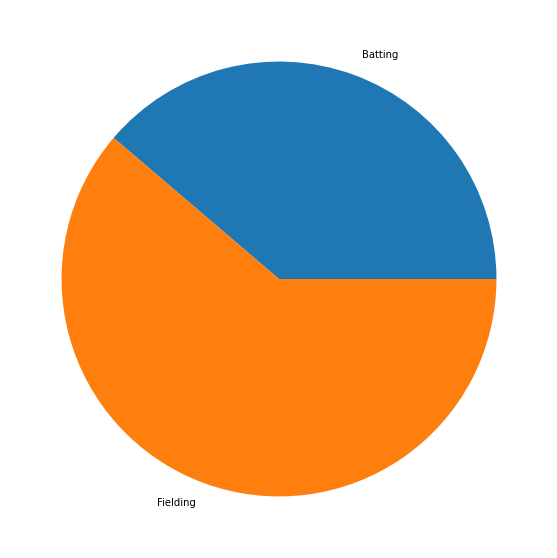

In [89]:
# Pie Chart for toss decision
plt.subplots(figsize = (10,10))

matches.loc[matches['toss_decision'] == 'bat', 'toss_decision'].count()
matches.loc[matches['toss_decision'] == 'field', 'toss_decision'].count()
choice = ['Batting', 'Fielding']
data_choice =[matches.loc[matches['toss_decision'] == 'bat', 'toss_decision'].count(),
              matches.loc[matches['toss_decision'] == 'field', 'toss_decision'].count()] 
plt.pie(data_choice, labels = choice)

([<matplotlib.patches.Wedge at 0x24aec1d1340>,
 [Text(-0.06852205779568263, 1.0978637108473188, 'Win'),
  Text(0.06852195500626306, -1.097863717262812, 'Loss')])

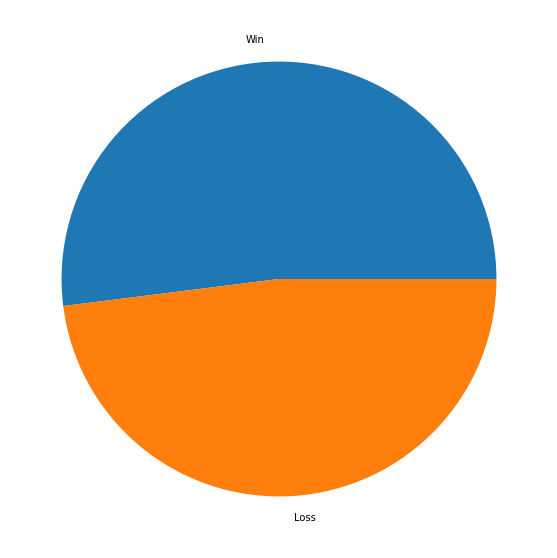

In [90]:
plt.subplots(figsize = (10,10))

tm_win = matches.loc[matches['toss_winner'] == matches['winner'], 'toss_winner'].count()
tm_lose = matches.loc[matches['toss_winner'] != matches['winner'], 'toss_winner'].count()
res = ['Win', 'Loss']
data_res = [matches.loc[matches['toss_winner'] == matches['winner'], 'toss_winner'].count(),
            matches.loc[matches['toss_winner'] != matches['winner'], 'toss_winner'].count()]
plt.pie(data_res, labels = res)

([<matplotlib.patches.Wedge at 0x24a818f18e0>,
 [Text(-0.7124775293542623, 0.8380786181291385, 'Right Handed'),
  Text(0.7124775293542619, -0.838078618129139, 'Left Handed')])

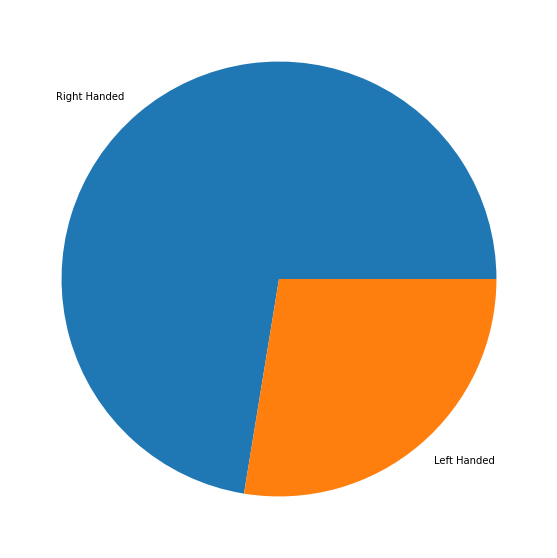

In [91]:
plt.subplots(figsize = (10,10))

r_handed = players.loc[players['Batting_Hand'] == 'Right_Hand', 'Batting_Hand'].count()
l_handed = players.loc[players['Batting_Hand'] == 'Left_Hand', 'Batting_Hand'].count()
handed = ['Right Handed', 'Left Handed']
data_handed = [r_handed, l_handed]
plt.pie(data_handed, labels = handed)

Country of player,
Left hand vs right hand,
Average age of players dicy,
maximum wickets,
linear regression of MI runs in 2020,